In [3]:
import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("problems.csv", delimiter=";")

<BarContainer object of 12 artists>

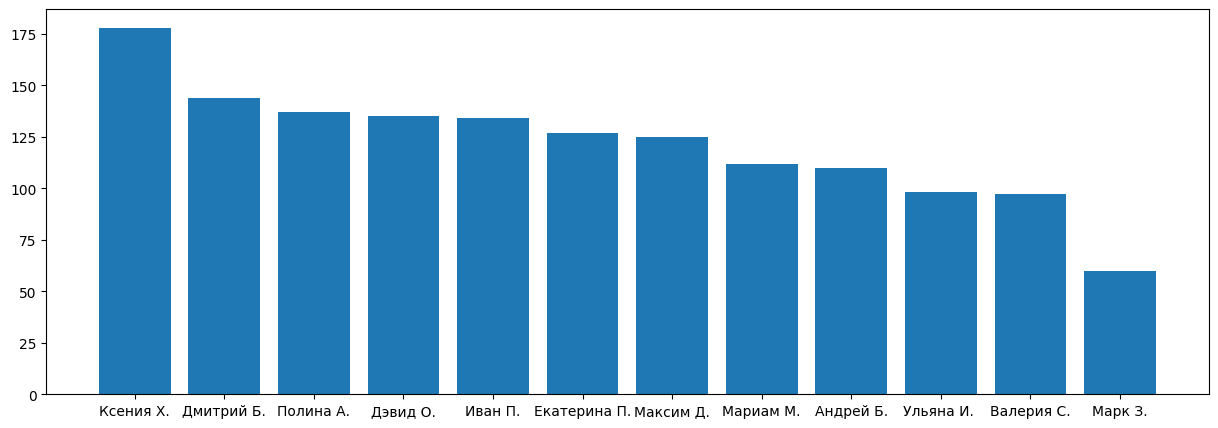

In [4]:
total = an.total_problems(df)
total.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(total.sort_values(ascending=False).index.tolist(), total.sort_values(ascending=False))

c:\Users\ivanu\OneDrive\Projects\ПМЖ\2024-2025, 7М\8M_Spec_Mat_Analyze\analyzer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Comp_Weights'] = 1/np.sqrt(df.sum(axis=1))
c:\Users\ivanu\OneDrive\Projects\ПМЖ\2024-2025, 7М\8M_Spec_Mat_Analyze\analyzer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Comp_Weights'] = 1/np.sqrt(df.sum(axis=1))


<BarContainer object of 12 artists>

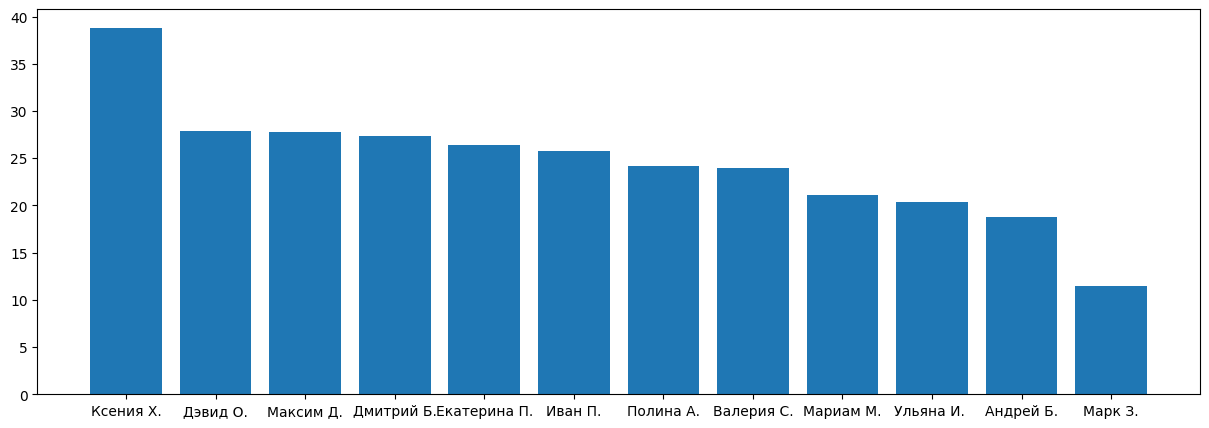

In [5]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.bar(points_c.sort_values(ascending=False).index.tolist(), points_c.sort_values(ascending=False))


<BarContainer object of 12 artists>

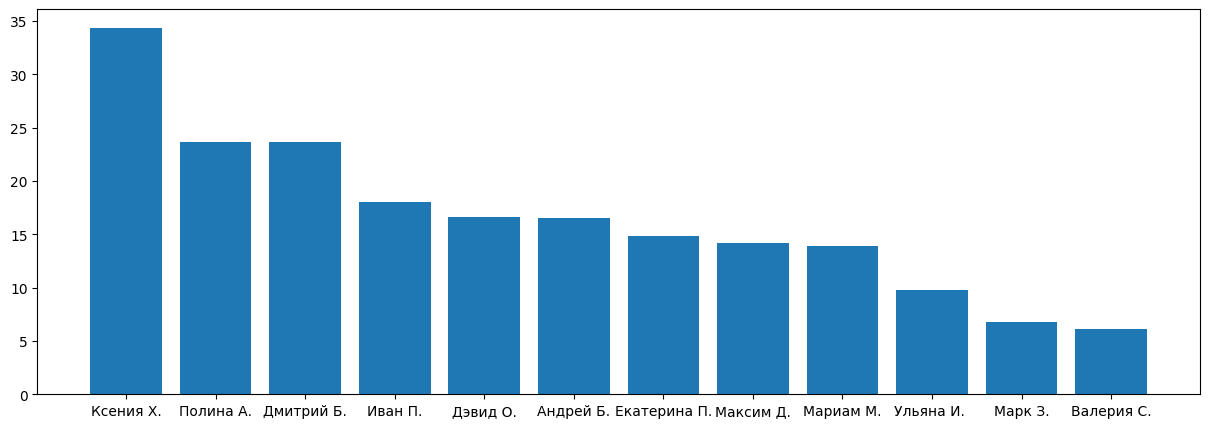

In [6]:
plt.figure(figsize=(15, 5))
plt.bar(points_t.sort_values(ascending=False).index.tolist(), points_t.sort_values(ascending=False))

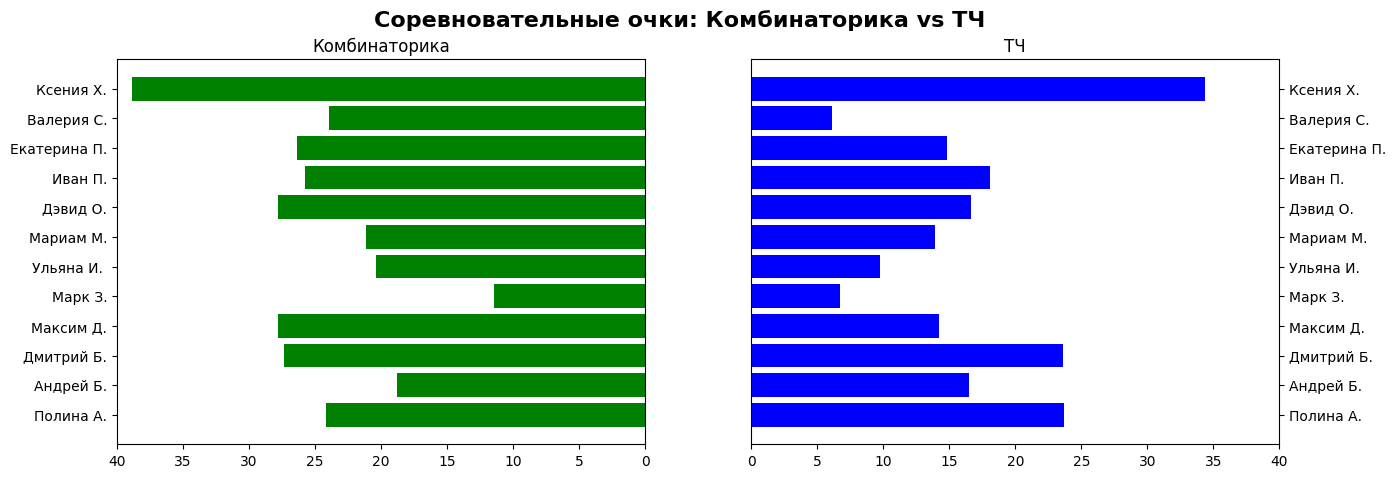

In [7]:
plt.figure(figsize=(15, 5))

plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([40, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 40])



plt.show()

<BarContainer object of 12 artists>

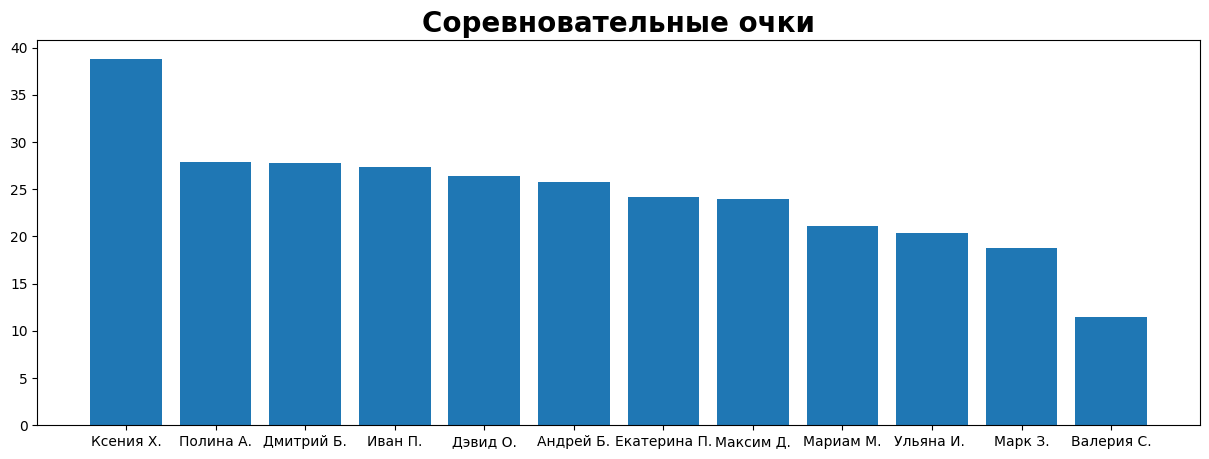

In [8]:
plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size = 20)
plt.bar(points_t.sort_values(ascending=False).index.tolist(), points_c.sort_values(ascending=False))

In [9]:
points = an.work_points(df, weight_func="linear")
points.sort_values(ascending=False)

c:\Users\ivanu\OneDrive\Projects\ПМЖ\2024-2025, 7М\8M_Spec_Mat_Analyze\analyzer.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work_Weights'] = df.sum(axis=1)


Ксения Х.       1455.0
Дмитрий Б.      1342.0
Иван П.         1325.0
Дэвид О.        1324.0
Полина А.       1298.0
Екатерина П.    1273.0
Максим Д.       1218.0
Мариам М.       1174.0
Андрей Б.       1129.0
Ульяна И.       1053.0
Валерия С.      1028.0
Марк З.          666.0
dtype: float64

In [10]:
plt.figure(figsize=(15, 5))
comp_points = an.competative_points(df, topic="all", weight_func='')
plt.bar(comp_points.sort_values(ascending=False).index.tolist(), comp_points.sort_values(ascending=False))

KeyError: 'Comp_Weights'

<Figure size 1500x500 with 0 Axes>

In [11]:
df1 = df.drop(columns=["Тема", "Подтема", "Процент номера", "Процент порядка"])
days_lst = []
for i in range(1, 9):
    days_lst.append((df==i).sum())
df2 = pd.DataFrame(days_lst, columns=df1.columns)

sns.lineplot(df2)

KeyError: "['Процент номера', 'Процент порядка'] not found in axis"

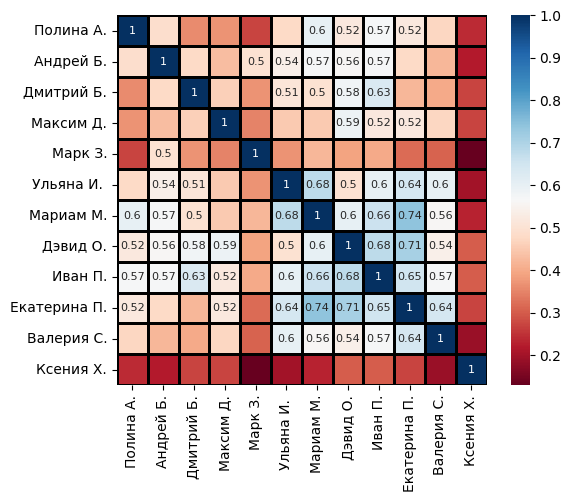

In [ ]:
df1 = an.bin_conduit(an.topic_loc(df))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.show()


In [ ]:
stats = pd.DataFrame(data=df.drop(columns=['Тема', 'Подтема']).columns, columns=['Имя'])
stats.insert(1, "Соревновательные очки", cp)
cp

c:\Users\ivanu\OneDrive\Projects\ПМЖ\2024-2025, 7М\8M_Spec_Mat_Analyze\analyzer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Comp_Weights'] = 1/np.sqrt(df.sum(axis=1))


Полина А.       47.854901
Андрей Б.       35.309568
Дмитрий Б.      51.018529
Максим Д.       41.998649
Марк З.         18.226644
Ульяна И.       30.189874
Мариам М.       35.048846
Дэвид О.        44.476877
Иван П.         43.818458
Екатерина П.    41.167683
Валерия С.      30.100622
Ксения Х.       73.207291
dtype: float64

: 